In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
sns.set_theme(style="ticks", color_codes=True)
#import math
pd.set_option('display.max_rows', None)

# __Load Data__

In [53]:
#Load all data
ph_results_df = pd.read_csv('finalResults_Ph.csv')
vr_results_df = pd.read_csv('finalResults_VR.csv')
ph_results_part_invalid_df = pd.read_csv('finalResults_part_invalid_Ph.csv')
vr_results_part_invalid_df = pd.read_csv('finalResults_part_invalid_VR.csv')
#Merge ph_results_df with ph_results_part_invalid_df
ph_results_df = ph_results_df.append(ph_results_part_invalid_df)
vr_results_df = vr_results_df.append(vr_results_part_invalid_df)
#Store as csv
#ph_results_df.to_csv('finalResults_Ph_all.csv')
#vr_results_df.to_csv('finalResults_VR_all.csv')

online_responses_df = pd.read_csv('..\\OnlineSurvey\\BuzzwireOnlineResponses.csv')

vr_results_df.drop(['Unnamed: 0'], axis=1, inplace=True)
ph_results_df.drop(['Unnamed: 0'], axis=1, inplace=True)

vr_results_df['Condition'] = 'VR'
ph_results_df['Condition'] = 'Physical'

vr_results_df['Participant_ID'] = vr_results_df['Participant_ID'].str.upper()
ph_results_df['Participant_ID'] = ph_results_df['Participant_ID'].str.upper()
online_responses_df['Participant_ID'] = online_responses_df['Participant_ID'].str.upper()



# __Process Data for Statistics__

In [61]:
#Normalize the data
def normalize_signals(df):

    df['Norm_Pretest_HR'] = (df['Pretest_HR'] - df['Baseline_HR'])/df['Baseline_HR']
    df['Norm_Pretest_GSR'] = (df['Pretest_GSR'] - df['Baseline_GSR'])/df['Baseline_GSR']
    df['Norm_Pretest_GSR_Peaks_Rate'] = (df['Pretest_GSR_Peaks_Rate'] - df['Baseline_GSR_Peaks_Rate'])/df['Baseline_GSR_Peaks_Rate']

    df['Norm_Level_1_HR'] = (df['Level_1_HR'] - df['Baseline_HR'])/df['Baseline_HR']
    df['Norm_Level_1_GSR'] = (df['Level_1_GSR'] - df['Baseline_GSR'])/df['Baseline_GSR']
    df['Norm_Level_1_GSR_Peaks_Rate'] = (df['Level_1_GSR_Peaks_Rate'] - df['Baseline_GSR_Peaks_Rate'])/df['Baseline_GSR_Peaks_Rate']

    df['Norm_Level_2_HR'] = (df['Level_2_HR'] - df['Baseline_HR'])/df['Baseline_HR']
    df['Norm_Level_2_GSR'] = (df['Level_2_GSR'] - df['Baseline_GSR'])/df['Baseline_GSR']
    df['Norm_Level_2_GSR_Peaks_Rate'] = (df['Level_2_GSR_Peaks_Rate'] - df['Baseline_GSR_Peaks_Rate'])/df['Baseline_GSR_Peaks_Rate']

    df['Norm_Level_3_HR'] = (df['Level_3_HR'] - df['Baseline_HR'])/df['Baseline_HR']
    df['Norm_Level_3_GSR'] = (df['Level_3_GSR'] - df['Baseline_GSR'])/df['Baseline_GSR']
    df['Norm_Level_3_GSR_Peaks_Rate'] = (df['Level_3_GSR_Peaks_Rate'] - df['Baseline_GSR_Peaks_Rate'])/df['Baseline_GSR_Peaks_Rate']

    df['Norm_Level_4_HR'] = (df['Level_4_HR'] - df['Baseline_HR'])/df['Baseline_HR']
    df['Norm_Level_4_GSR'] = (df['Level_4_GSR'] - df['Baseline_GSR'])/df['Baseline_GSR']
    df['Norm_Level_4_GSR_Peaks_Rate'] = (df['Level_4_GSR_Peaks_Rate'] - df['Baseline_GSR_Peaks_Rate'])/df['Baseline_GSR_Peaks_Rate']

    df['Norm_Posttest_HR'] = (df['Posttest_HR'] - df['Baseline_HR'])/df['Baseline_HR']
    df['Norm_Posttest_GSR'] = (df['Posttest_GSR'] - df['Baseline_GSR'])/df['Baseline_GSR']
    df['Norm_Posttest_GSR_Peaks_Rate'] = (df['Posttest_GSR_Peaks_Rate'] - df['Baseline_GSR_Peaks_Rate'])/df['Baseline_GSR_Peaks_Rate']

    

#Difference between pre-test and post-test time/mistakes in a new column
def calculate_gains(df):
    df['Time_Gain'] = df['Pretest_Time'] - df['Posttest_Time']
    df['Mistake_Gain'] = df['Pretest_Mistake_Time'] - df['Posttest_Mistake_Time']

#Calculate mean normalized HR across 4 training levels
def calculate_mean_training_hr(df):
    df['Mean_Norm_Training_HR'] = (df['Norm_Level_1_HR'] + df['Norm_Level_2_HR'] + df['Norm_Level_3_HR'] + df['Norm_Level_4_HR']) / 4

#Calculate mean normalized HR across 4 training levels
def calculate_mean_training_rmssd(df):
    df['Mean_Training_RMSSD'] = (df['Level_1_RMSSD'] + df['Level_2_RMSSD'] + df['Level_3_RMSSD'] + df['Level_4_RMSSD']) / 4

def calculate_mean_training_sdnn(df):
    df['Mean_Training_SDNN'] = (df['Level_1_SDNN'] + df['Level_2_SDNN'] + df['Level_3_SDNN'] + df['Level_4_SDNN']) / 4

def calculate_mean_training_lfhfratio(df):
    df['Mean_Training_LFHF_Ratio'] = (df['Level_1_LFHF_Ratio'] + df['Level_2_LFHF_Ratio'] + df['Level_3_LFHF_Ratio'] + df['Level_4_LFHF_Ratio']) / 4

def calculate_mean_training_hfn(df):
    df['Mean_Training_HFN'] = (df['Level_1_HFN'] + df['Level_2_HFN'] + df['Level_3_HFN'] + df['Level_4_HFN']) / 4

#Calculate mean normalized GSR across 4 training levels    
def calculate_mean_training_gsr(df):
    df['Mean_Norm_Training_GSR'] = (df['Norm_Level_1_GSR'] + df['Norm_Level_2_GSR'] + df['Norm_Level_3_GSR'] + df['Norm_Level_4_GSR']) / 4

def calculate_mean_training_gsr_peaks_rate(df):
    df['Mean_Norm_Training_GSR_Peaks_Rate'] = (df['Norm_Level_1_GSR_Peaks_Rate'] + df['Norm_Level_2_GSR_Peaks_Rate'] + df['Norm_Level_3_GSR_Peaks_Rate'] + df['Norm_Level_4_GSR_Peaks_Rate']) / 4

def calculate_mean_training_gsr_peak_amplitude(df):
    df['Mean_Training_GSR_Peak_Amplitude'] = df[["Level_1_GSR_Mean_Peak_Amplitude", "Level_2_GSR_Mean_Peak_Amplitude","Level_3_GSR_Mean_Peak_Amplitude","Level_4_GSR_Mean_Peak_Amplitude"]].mean(axis=1, skipna=True) #np.nansum([df['Level_1_GSR_Peak_Amplitude'], df['Level_2_GSR_Peak_Amplitude'], df['Level_3_GSR_Peak_Amplitude'], df['Level_4_GSR_Peak_Amplitude']) / 4       





In [62]:
normalize_signals(ph_results_df)
normalize_signals(vr_results_df)

calculate_gains(ph_results_df)
calculate_gains(vr_results_df)

calculate_mean_training_hr(ph_results_df)
calculate_mean_training_hr(vr_results_df)

calculate_mean_training_gsr(ph_results_df)
calculate_mean_training_gsr(vr_results_df)

calculate_mean_training_rmssd(ph_results_df)
calculate_mean_training_rmssd(vr_results_df)

calculate_mean_training_sdnn(ph_results_df)
calculate_mean_training_sdnn(vr_results_df)

calculate_mean_training_lfhfratio(ph_results_df)
calculate_mean_training_lfhfratio(vr_results_df)

calculate_mean_training_hfn(ph_results_df)
calculate_mean_training_hfn(vr_results_df)

calculate_mean_training_gsr_peaks_rate(ph_results_df)
calculate_mean_training_gsr_peaks_rate(vr_results_df)

calculate_mean_training_gsr_peak_amplitude(ph_results_df)
calculate_mean_training_gsr_peak_amplitude(vr_results_df)



In [15]:
#ph_results_df['Mean_Training_GSR_Peak_Amplitude']

In [16]:
#vr_results_df[['Participant_ID','Baseline_GSR','Posttest_GSR','Norm_Posttest_GSR']]

In [36]:
#Combined score metric 
#ph_results_df['Norm_Pretest_Score'] = 1 / np.sqrt(ph_results_df['Pretest_Time'] * ph_results_df['Pretest_Mistake_Time'])
#ph_results_df['Norm_Level_1_Score'] = 1 / np.sqrt(ph_results_df['Level_1_Time'] * ph_results_df['Level_1_Mistake_Time'])
#ph_results_df['Norm_Level_2_Score'] = 1 / np.sqrt(ph_results_df['Level_2_Time'] * ph_results_df['Level_2_Mistake_Time'])
#ph_results_df['Norm_Level_3_Score'] = 1 / np.sqrt(ph_results_df['Level_3_Time'] * ph_results_df['Level_3_Mistake_Time'])
#ph_results_df['Norm_Level_4_Score'] = 1 / np.sqrt(ph_results_df['Level_4_Time'] * ph_results_df['Level_4_Mistake_Time'])

In [50]:
#ph_results_df.boxplot(column=['Norm_Pretest_HR', 'Norm_Level_1_HR' , 'Norm_Level_2_HR', 'Norm_Level_3_HR', 'Norm_Level_4_HR','Norm_Posttest_HR'], figsize=(14,10), showmeans=True)

In [51]:
#vr_results_df.boxplot(column=['Norm_Pretest_HR', 'Norm_Level_1_HR' , 'Norm_Level_2_HR', 'Norm_Level_3_HR', 'Norm_Level_4_HR','Norm_Posttest_HR'], figsize=(14,10), showmeans=True)

In [14]:
#ph_results_df.boxplot(column=['Norm_Pretest_GSR', 'Norm_Level_1_GSR' , 'Norm_Level_2_GSR', 'Norm_Level_3_GSR', 'Norm_Level_4_GSR','Norm_Posttest_GSR'], figsize=(14,10), showmeans=True)

In [15]:
#vr_results_df.boxplot(column=['Norm_Pretest_GSR', 'Norm_Level_1_GSR' , 'Norm_Level_2_GSR', 'Norm_Level_3_GSR', 'Norm_Level_4_GSR','Norm_Posttest_GSR'], figsize=(14,10), showmeans=True)

In [9]:
#combined_results_df = pd.concat([ph_results_df, vr_results_df], axis=0)

In [16]:
#combined_results_df.rename(columns={'Mean_Norm_Training_GSR': 'Mean Normalized GSR (Training)', 'Mean_Norm_Training_HR': 'Mean Normalized HR (Training)', 'Time_Gain':'Task Completion Time (Gain)', 'Mistake_Gain':'Mistake Time (Gain)'}, inplace=True)
#sns.pairplot(
#    combined_results_df,
#    x_vars=["Mean Normalized GSR (Training)", "Mean Normalized HR (Training)"],
#    y_vars=["Task Completion Time (Gain)", "Mistake Time (Gain)"],
#)

In [ ]:
def check_normality_all_features(df):
    for column in df.columns:
        #print(column,' ', df[column].notna().value_counts())
        if column != 'Participant_ID':        
            if stats.shapiro(df[df[column].notna()][column]).pvalue < 0.05:
                print(column,' is not normally distributed')
            else:
                print('** ',column,' is normally distributed')
print("Shapiro test for normality (Not normal if p-value is less than 0.05)")
print("VR")
print('----')
check_normality_all_features(vr_results_df)
print("Physical")
print('--------')
check_normality_all_features(ph_results_df)

#for column in ['Baseline_GSR', 'Norm_Pretest_GSR' , 'Norm_Level_1_GSR', 'Norm_Level_2_GSR', 'Norm_Level_3_GSR', 'Norm_Level_4_GSR', 'Norm_Posttest_GSR', 'Baseline_HR', 'Norm_Pretest_HR' , 'Norm_Level_1_HR', 'Norm_Level_2_HR', 'Norm_Level_3_HR', 'Norm_Level_4_HR', 'Norm_Posttest_HR', 'Pretest_Time', 'Pretest_Mistake_Time', 'Posttest_Time', 'Posttest_Mistake_Time']:
#    print(column, " - shapiro test p-value less than 0.05 - ", stats.shapiro(ph_results_df[ph_results_df[column].notna()][column]).pvalue < 0.05) #Not normal if p-value is less than 0.05

# __Performance gain__
-----------------

## __Performance gain - Within Physical and VR__

In [103]:
#Mean of pre-test and post-test time
print("\nMean of pre-test and post-test time in physical condition\n-------------------------------------")
print(round(ph_results_df['Pretest_Time'].mean(skipna=True),2), round(ph_results_df['Posttest_Time'].mean(skipna=True),2))
#Wilcoxon test for pre-test and post-test time
print("Wilcoxon test for pre-test and post-test time in physical condition")
print(stats.wilcoxon(ph_results_df['Pretest_Time'], ph_results_df['Posttest_Time']))

#Mean of pre-test and post-test mistake time in physical condition
print("\nMean of pre-test and post-test mistake time in physical condition\n-------------------------------------")
print(round(ph_results_df['Pretest_Mistake_Time'].mean(skipna=True),2), round(ph_results_df['Posttest_Mistake_Time'].mean(skipna=True),2))
#Wilcoxon test for pre-test mistake and post-test mistake time
print("Wilcoxon test for pre-test mistake and post-test mistake time in physical condition")
print(stats.wilcoxon(ph_results_df['Pretest_Mistake_Time'], ph_results_df['Posttest_Mistake_Time']))


#Mean of pre-test and post-test time
print("\nMean of pre-test and post-test time in VR condition\n-------------------------------------")
print(round(vr_results_df['Pretest_Time'].mean(skipna=True),2), round(vr_results_df['Posttest_Time'].mean(skipna=True),2))
#Wilcoxon test for pre-test and post-test time
print("Wilcoxon test for pre-test and post-test time in VR condition")
print(stats.wilcoxon(vr_results_df['Pretest_Time'], vr_results_df['Posttest_Time']))

#Mean of pre-test and post-test mistake time in physical condition
print("\nMean of pre-test and post-test mistake time in VR condition\n-------------------------------------")
print(round(vr_results_df['Pretest_Mistake_Time'].mean(skipna=True),2), round(vr_results_df['Posttest_Mistake_Time'].mean(skipna=True),2))
#Wilcoxon test for pre-test mistake and post-test mistake time
print("Wilcoxon test for pre-test mistake and post-test mistake time in VR condition")
print(stats.wilcoxon(vr_results_df['Pretest_Mistake_Time'], vr_results_df['Posttest_Mistake_Time']))






Mean of pre-test and post-test time in physical condition
-------------------------------------
20.72 21.55
Wilcoxon test for pre-test and post-test time in physical condition
WilcoxonResult(statistic=387.0, pvalue=0.9666063228557329)

Mean of pre-test and post-test mistake time in physical condition
-------------------------------------
3.22 2.15
Wilcoxon test for pre-test mistake and post-test mistake time in physical condition
WilcoxonResult(statistic=64.0, pvalue=5.381716402386978e-06)

Mean of pre-test and post-test time in VR condition
-------------------------------------
24.7 23.37
Wilcoxon test for pre-test and post-test time in VR condition
WilcoxonResult(statistic=352.0, pvalue=0.4356291562728627)

Mean of pre-test and post-test mistake time in VR condition
-------------------------------------
4.24 2.99
Wilcoxon test for pre-test mistake and post-test mistake time in VR condition
WilcoxonResult(statistic=114.0, pvalue=6.931525704115409e-05)


## __Performance gain - Physical x VR__


In [101]:
#VR vs Physical
print("\nVR vs Physical in performance gain\n-------------------------------------")

print("\nMean Time gain in physical vs VR condition")
print(round(ph_results_df['Time_Gain'].mean(skipna=True),2), round(vr_results_df['Time_Gain'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=ph_results_df['Time_Gain'], y=vr_results_df['Time_Gain'], alternative = 'less'))

print('\nMistake gain in physical vs VR condition')
print(round(ph_results_df['Mistake_Gain'].mean(skipna=True),2), round(vr_results_df['Mistake_Gain'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=ph_results_df['Mistake_Gain'], y=vr_results_df['Mistake_Gain'], alternative = 'less'))


VR vs Physical in performance gain
-------------------------------------

Mean Time gain in physical vs VR condition
-0.83 1.33
Statistical significance -  MannwhitneyuResult(statistic=722.0, pvalue=0.2864335931288994)

Mistake gain in physical vs VR condition
1.06 1.24
Statistical significance -  MannwhitneyuResult(statistic=773.0, pvalue=0.4745895252655665)


# __Biosignals__ 
-----------------

## __Biosignals - Physical x VR__ 

In [64]:
print('HR \n-----')
#Mean HR
print("\nMean of HR in physical vs VR condition")
print(round(ph_results_df['Mean_Norm_Training_HR'].mean(skipna=True),2), round(vr_results_df['Mean_Norm_Training_HR'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=ph_results_df['Mean_Norm_Training_HR'].dropna(), y=vr_results_df['Mean_Norm_Training_HR'].dropna(), alternative = 'greater'))

#RMSSD
print("\nMean of RMSSD in physical vs VR condition")
print(round(ph_results_df['Mean_Training_RMSSD'].mean(skipna=True),2), round(vr_results_df['Mean_Training_RMSSD'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=ph_results_df['Mean_Training_RMSSD'].dropna(), y=vr_results_df['Mean_Training_RMSSD'].dropna(), alternative = 'less')) 

#SDNN
print("\nMean of SDNN in physical vs VR condition")
print(round(ph_results_df['Mean_Training_SDNN'].mean(skipna=True),2), round(vr_results_df['Mean_Training_SDNN'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=ph_results_df['Mean_Training_SDNN'].dropna(), y=vr_results_df['Mean_Training_SDNN'].dropna(), alternative = 'less') )

#LF/HF ratio
print("\nMean of LF/HF Ratio in physical vs VR condition")
print(round(ph_results_df['Mean_Training_LFHF_Ratio'].mean(skipna=True),2), round(vr_results_df['Mean_Training_LFHF_Ratio'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=ph_results_df['Mean_Training_LFHF_Ratio'].dropna(), y=vr_results_df['Mean_Training_LFHF_Ratio'].dropna(), alternative = 'less') )

#HFN
print("\nMean of HFN in physical vs VR condition")
print(round(ph_results_df['Mean_Training_HFN'].mean(skipna=True),2), round(vr_results_df['Mean_Training_HFN'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=ph_results_df['Mean_Training_HFN'].dropna(), y=vr_results_df['Mean_Training_HFN'].dropna(), alternative = 'greater') )

print('GSR \n-----')
#Mean GSR
print("\nMean of GSR in physical vs VR condition")
print(round(ph_results_df['Mean_Norm_Training_GSR'].mean(skipna=True),2), round(vr_results_df['Mean_Norm_Training_GSR'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=ph_results_df['Mean_Norm_Training_GSR'].dropna(), y=vr_results_df['Mean_Norm_Training_GSR'].dropna(), alternative = 'less'))

#GSR Peak amplitude
print("\nMean of GSR peak amplitude in physical vs VR condition")
print(round(ph_results_df['Mean_Training_GSR_Peak_Amplitude'].mean(skipna=True),2), round(vr_results_df['Mean_Training_GSR_Peak_Amplitude'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=ph_results_df['Mean_Training_GSR_Peak_Amplitude'].dropna(), y=vr_results_df['Mean_Training_GSR_Peak_Amplitude'].dropna(), alternative = 'greater') )

#GSR peaks rate
print("\nMean of GSR peaks rate in physical vs VR condition")
print(round(ph_results_df['Mean_Norm_Training_GSR_Peaks_Rate'].mean(skipna=True),2), round(vr_results_df['Mean_Norm_Training_GSR_Peaks_Rate'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=ph_results_df['Mean_Norm_Training_GSR_Peaks_Rate'].dropna(), y=vr_results_df['Mean_Norm_Training_GSR_Peaks_Rate'].dropna(), alternative = 'greater'))

HR 
 -----
Mean of HR in physical vs VR condition
0.0 -0.01
Statistical significance MannwhitneyuResult(statistic=871.0, pvalue=0.13582472663644052)
Mean of RMSSD in physical vs VR condition
120.47 156.21
Statistical significance MannwhitneyuResult(statistic=649.0, pvalue=0.13365786305046473)
Mean of SDNN in physical vs VR condition
103.0 125.88
Statistical significance MannwhitneyuResult(statistic=660.0, pvalue=0.15881545340430797)
Mean of LF/HF Ratio in physical vs VR condition
2.12 1.87
Statistical significance MannwhitneyuResult(statistic=801.0, pvalue=0.6589974925183048)
Mean of HFN in physical vs VR condition
49.55 50.1
Statistical significance MannwhitneyuResult(statistic=750.0, pvalue=0.5437664435534985)
GSR 
 -----
Mean of GSR in physical vs VR condition
1.77 2.37
Statistical significance MannwhitneyuResult(statistic=599.0, pvalue=0.3094991962340233)
Mean of GSR peak amplitude in physical vs VR condition
0.21 0.19
Statistical significance -  MannwhitneyuResult(statistic=676.0,

In [16]:
#Count of non nan values for Mean_Training_RMSSD
print("Count of non nan values for Mean_Training_RMSSD")
print(vr_results_df['Mean_Training_SDNN'].notna().value_counts())

Count of non nan values for Mean_Training_RMSSD
True     40
False     1
Name: Mean_Training_SDNN, dtype: int64


In [69]:
combined_results_df = pd.concat([vr_results_df, ph_results_df], axis=0)
#Merge the online responses with the combined results DF (sensor data)
combined_results_df = pd.merge(combined_results_df, online_responses_df, on='Participant_ID', how='outer')
#combined_results_df.to_csv('combinedResults.csv')

In [70]:
combined_results_df.rename(columns={'Mean_Norm_Training_HR' : 'Mean HR (Training)', 'Mean_Training_RMSSD': 'Mean RMSSD (Training)', 'Mean_Training_SDNN': 'Mean SDNN (Training)', 'Mean_Norm_Training_GSR_Peaks_Rate': 'Mean GSR Peaks Rate (Training)', 'Mean_Training_LFHF_Ratio': 'Mean LFHF Ratio (Training)', 'Time_Gain':'Task Completion Time (Gain)', 'Mistake_Gain':'Mistake Time (Gain)', 'Mean_Norm_Training_GSR' : 'Mean GSR (Training)',  'Mean_Training_HFN' : 'Mean HF Normalized (Training)', 'Mean_Training_GSR_Peak_Amplitude' : 'Mean GSR Peak Amplitude (Training)'}, inplace=True)


## __Biosignals x Performance__

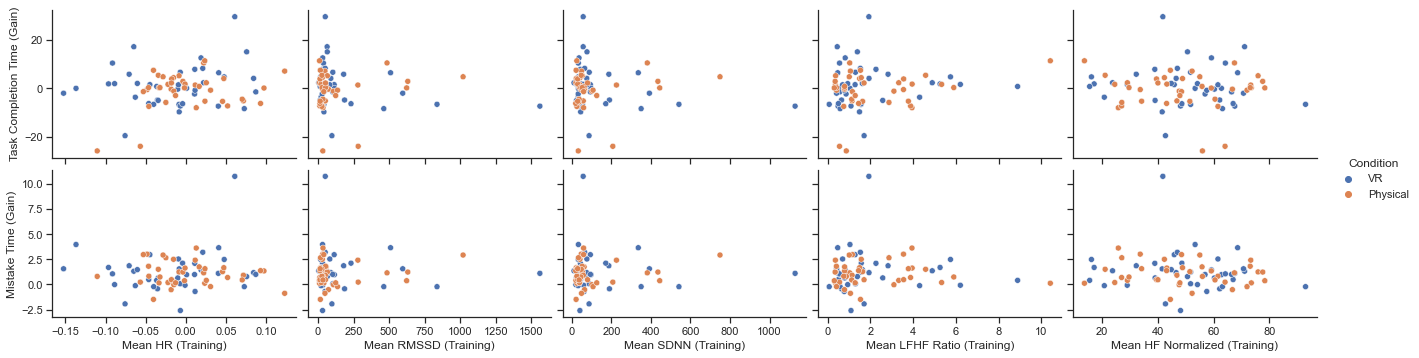

In [81]:
sns.pairplot(
    combined_results_df,
    x_vars=['Mean HR (Training)', "Mean RMSSD (Training)", "Mean SDNN (Training)", "Mean LFHF Ratio (Training)", "Mean HF Normalized (Training)"],
    y_vars=["Task Completion Time (Gain)", "Mistake Time (Gain)"],
    aspect=1.5,
    hue='Condition'
) 

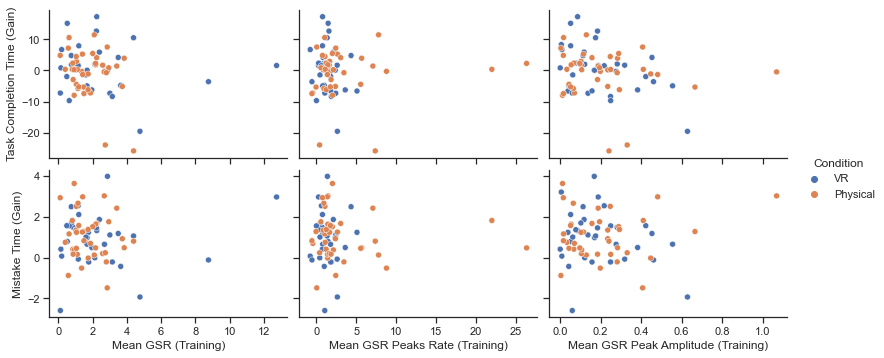

In [75]:
sns.pairplot(
    combined_results_df,
    x_vars=["Mean GSR (Training)", "Mean GSR Peaks Rate (Training)", "Mean GSR Peak Amplitude (Training)"],
    y_vars=["Task Completion Time (Gain)", "Mistake Time (Gain)"],
    aspect=1.5,
    hue='Condition'
) 

In [36]:
print(stats.spearmanr(combined_results_df['Avg GSR Peaks Rate (Training)'], combined_results_df['Task Completion Time (Gain)'], nan_policy='omit'))


SpearmanrResult(correlation=0.1140798790552736, pvalue=0.3365431694400285)


## __Biosignals - High Performance Gain vs Low Performance Gain groups__

### __Mistake Time Gain__

In [95]:
#High vs low performance groups w.r.t mistake gain 
print('High vs low performance groups w.r.t mistake time gain \n--------------------------------------------------------------')
combined_results_df_high_mistake_gain = combined_results_df[combined_results_df['Mistake Time (Gain)'] > combined_results_df['Mistake Time (Gain)'].quantile(0.85)]
#print(len(combined_results_df_high_mistake_gain))
combined_results_df_low_mistake_gain = combined_results_df[combined_results_df['Mistake Time (Gain)'] < combined_results_df['Mistake Time (Gain)'].quantile(0.15)]
#print(len(combined_results_df_low_mistake_gain))

print('HR \n-----')
#HR
print("Mean of HR in high vs low mistake gain groups")
print(round(combined_results_df_high_mistake_gain['Mean HR (Training)'].mean(skipna=True),2), round(combined_results_df_low_mistake_gain['Mean HR (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=combined_results_df_high_mistake_gain['Mean HR (Training)'].dropna(), y=combined_results_df_low_mistake_gain['Mean HR (Training)'].dropna(), alternative = 'less')) 

#RMSSD
print("\nMean of RMSSD in high vs low mistake gain groups")
print(round(combined_results_df_high_mistake_gain['Mean RMSSD (Training)'].mean(skipna=True),2), round(combined_results_df_low_mistake_gain['Mean RMSSD (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=combined_results_df_high_mistake_gain['Mean RMSSD (Training)'].dropna(), y=combined_results_df_low_mistake_gain['Mean RMSSD (Training)'].dropna(), alternative = 'less')) 

#SDNN
print("\nMean of SDNN in high vs low mistake gain groups")
print(round(combined_results_df_high_mistake_gain['Mean SDNN (Training)'].mean(skipna=True),2), round(combined_results_df_low_mistake_gain['Mean SDNN (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=combined_results_df_high_mistake_gain['Mean SDNN (Training)'].dropna(), y=combined_results_df_low_mistake_gain['Mean SDNN (Training)'].dropna(), alternative = 'less')) 

#HFN
print("\nMean of HFN in high vs low mistake gain groups")
print(round(combined_results_df_high_mistake_gain['Mean HF Normalized (Training)'].mean(skipna=True),2), round(combined_results_df_low_mistake_gain['Mean HF Normalized (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=combined_results_df_high_mistake_gain['Mean HF Normalized (Training)'].dropna(), y=combined_results_df_low_mistake_gain['Mean HF Normalized (Training)'].dropna(), alternative = 'less'))

#LF/HF ratio
print("\nMean of LF/HF Ratio in high vs low mistake gain groups")
print(round(combined_results_df_high_mistake_gain['Mean LFHF Ratio (Training)'].mean(skipna=True),2), round(combined_results_df_low_mistake_gain['Mean LFHF Ratio (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=combined_results_df_high_mistake_gain['Mean LFHF Ratio (Training)'].dropna(), y=combined_results_df_low_mistake_gain['Mean LFHF Ratio (Training)'].dropna(), alternative = 'greater')) 

print('\nGSR \n-----')
#GSR
print("\nMean of GSR in high vs low mistake gain groups")
print(round(combined_results_df_high_mistake_gain['Mean GSR (Training)'].mean(skipna=True),2), round(combined_results_df_low_mistake_gain['Mean GSR (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=combined_results_df_high_mistake_gain['Mean GSR (Training)'].dropna(), y=combined_results_df_low_mistake_gain['Mean GSR (Training)'].dropna(), alternative = 'less'))

#GSR Peak amplitude
print("\nMean of GSR Peak Amplitude in high vs low mistake gain groups")
print(round(combined_results_df_high_mistake_gain['Mean GSR Peak Amplitude (Training)'].mean(skipna=True),2), round(combined_results_df_low_mistake_gain['Mean GSR Peak Amplitude (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=combined_results_df_high_mistake_gain['Mean GSR Peak Amplitude (Training)'].dropna(), y=combined_results_df_low_mistake_gain['Mean GSR Peak Amplitude (Training)'].dropna(), alternative = 'less'))

#GSR peaks rate
print("\nMean of GSR peaks rate in high vs low mistake gain groups")
print(round(combined_results_df_high_mistake_gain['Mean GSR Peaks Rate (Training)'].mean(skipna=True),2), round(combined_results_df_low_mistake_gain['Mean GSR Peaks Rate (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=combined_results_df_high_mistake_gain['Mean GSR Peaks Rate (Training)'].dropna(), y=combined_results_df_low_mistake_gain['Mean GSR Peaks Rate (Training)'].dropna(), alternative = 'less')) 

#print(stats.spearmanr(combined_results_df_high_HR['Avg_HR'], combined_results_df_high_HR['Mistake_Gain'], nan_policy='omit'))
#print(stats.spearmanr(combined_results_df_high_HR['Avg_HR'], combined_results_df_high_HR['Time_Gain'], nan_policy='omit'))

High vs low performance groups w.r.t mistake time gain 
--------------------------------------------------------------
HR 
-----
Mean of HR in high vs low mistake gain groups
-0.02 -0.0
Statistical significance -  MannwhitneyuResult(statistic=62.0, pvalue=0.4147237944967891)

Mean of RMSSD in high vs low mistake gain groups
168.22 178.53
Statistical significance -  MannwhitneyuResult(statistic=58.0, pvalue=0.32218657497997516)

Mean of SDNN in high vs low mistake gain groups
137.29 140.27
Statistical significance -  MannwhitneyuResult(statistic=61.0, pvalue=0.3909070017443844)

Mean of HFN in high vs low mistake gain groups
45.89 56.63
Statistical significance -  MannwhitneyuResult(statistic=40.0, pvalue=0.05827545976610699)

Mean of LF/HF Ratio in high vs low mistake gain groups
1.76 1.18
Statistical significance -  MannwhitneyuResult(statistic=91.0, pvalue=0.06579380320333426)

GSR 
-----

Mean of GSR in high vs low mistake gain groups
2.68 2.98
Statistical significance -  Mannwhitne

### __Task time Gain__

In [94]:
#High vs low performance groups w.r.t task completion time gain 
print('High vs low performance groups w.r.t task completion time gain \n--------------------------------------------------------------')
combined_results_df_high_task_time_gain = combined_results_df[combined_results_df['Task Completion Time (Gain)'] > combined_results_df['Task Completion Time (Gain)'].quantile(0.85)]
print(len(combined_results_df_high_task_time_gain))
combined_results_df_low_task_time_gain = combined_results_df[combined_results_df['Task Completion Time (Gain)'] < combined_results_df['Task Completion Time (Gain)'].quantile(0.15)]
print(len(combined_results_df_low_task_time_gain))

print('HR \n-----')
#HR
print("Mean of HR in high vs low task time gain groups")
print(round(combined_results_df_high_task_time_gain['Mean HR (Training)'].mean(skipna=True),2), round(combined_results_df_low_task_time_gain['Mean HR (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=combined_results_df_high_task_time_gain['Mean HR (Training)'].dropna(), y=combined_results_df_low_task_time_gain['Mean HR (Training)'].dropna(), alternative = 'greater')) 

#RMSSD
print("\nMean of RMSSD in high vs low task time gain groups")
print(round(combined_results_df_high_task_time_gain['Mean RMSSD (Training)'].mean(skipna=True),2), round(combined_results_df_low_task_time_gain['Mean RMSSD (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=combined_results_df_high_task_time_gain['Mean RMSSD (Training)'].dropna(), y=combined_results_df_low_task_time_gain['Mean RMSSD (Training)'].dropna(), alternative = 'less')) 

#SDNN
print("\nMean of SDNN in high vs low task time gain groups")
print(round(combined_results_df_high_task_time_gain['Mean SDNN (Training)'].mean(skipna=True),2), round(combined_results_df_low_task_time_gain['Mean SDNN (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=combined_results_df_high_task_time_gain['Mean SDNN (Training)'].dropna(), y=combined_results_df_low_task_time_gain['Mean SDNN (Training)'].dropna(), alternative = 'less')) 

#HFN
print("\nMean of HFN in high vs low task time gain groups")
print(round(combined_results_df_high_task_time_gain['Mean HF Normalized (Training)'].mean(skipna=True),2), round(combined_results_df_low_task_time_gain['Mean HF Normalized (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=combined_results_df_high_task_time_gain['Mean HF Normalized (Training)'].dropna(), y=combined_results_df_low_task_time_gain['Mean HF Normalized (Training)'].dropna(), alternative = 'less'))

#LF/HF ratio
print("\nMean of LF/HF Ratio in high vs low task time gain groups")
print(round(combined_results_df_high_task_time_gain['Mean LFHF Ratio (Training)'].mean(skipna=True),2), round(combined_results_df_low_task_time_gain['Mean LFHF Ratio (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=combined_results_df_high_task_time_gain['Mean LFHF Ratio (Training)'].dropna(), y=combined_results_df_low_task_time_gain['Mean LFHF Ratio (Training)'].dropna(), alternative = 'greater')) 

print('\nGSR \n-----')
#GSR
print("\nMean of GSR in high vs low task time gain groups")
print(round(combined_results_df_high_task_time_gain['Mean GSR (Training)'].mean(skipna=True),2), round(combined_results_df_low_task_time_gain['Mean GSR (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=combined_results_df_high_task_time_gain['Mean GSR (Training)'].dropna(), y=combined_results_df_low_task_time_gain['Mean GSR (Training)'].dropna(), alternative = 'less'))

#GSR Peak amplitude
print("\nMean of GSR Peak Amplitude in high vs low task time gain groups")
print(round(combined_results_df_high_task_time_gain['Mean GSR Peak Amplitude (Training)'].mean(skipna=True),2), round(combined_results_df_low_task_time_gain['Mean GSR Peak Amplitude (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=combined_results_df_high_task_time_gain['Mean GSR Peak Amplitude (Training)'].dropna(), y=combined_results_df_low_task_time_gain['Mean GSR Peak Amplitude (Training)'].dropna(), alternative = 'less'))

#GSR peaks rate
print("\nMean of GSR peaks rate in high vs low task time gain groups")
print(round(combined_results_df_high_task_time_gain['Mean GSR Peaks Rate (Training)'].mean(skipna=True),2), round(combined_results_df_low_task_time_gain['Mean GSR Peaks Rate (Training)'].mean(skipna=True),2))
print('Statistical significance - ', stats.mannwhitneyu(x=combined_results_df_high_task_time_gain['Mean GSR Peaks Rate (Training)'].dropna(), y=combined_results_df_low_task_time_gain['Mean GSR Peaks Rate (Training)'].dropna(), alternative = 'less')) 

#print(stats.spearmanr(combined_results_df_high_HR['Avg_HR'], combined_results_df_high_HR['Mistake_Gain'], nan_policy='omit'))
#print(stats.spearmanr(combined_results_df_high_HR['Avg_HR'], combined_results_df_high_HR['Time_Gain'], nan_policy='omit'))



High vs low performance groups w.r.t task completion time gain 
--------------------------------------------------------------
12
12
HR 
-----
Mean of HR in high vs low task time gain groups
0.01 -0.01
Statistical significance -  MannwhitneyuResult(statistic=86.0, pvalue=0.11504209095812556)

Mean of RMSSD in high vs low task time gain groups
81.51 288.73
Statistical significance -  MannwhitneyuResult(statistic=56.0, pvalue=0.2793799114354468)

Mean of SDNN in high vs low task time gain groups
76.55 216.39
Statistical significance -  MannwhitneyuResult(statistic=51.0, pvalue=0.18608571989106287)

Mean of HFN in high vs low task time gain groups
50.07 53.53
Statistical significance -  MannwhitneyuResult(statistic=62.0, pvalue=0.4147237944967891)

Mean of LF/HF Ratio in high vs low task time gain groups
2.09 1.42
Statistical significance -  MannwhitneyuResult(statistic=76.0, pvalue=0.2793799114354468)

GSR 
-----

Mean of GSR in high vs low task time gain groups
1.86 2.22
Statistical sig

# __Self-efficacy__
---

## __Self-efficacy - Within Physical and VR__

In [114]:
print('Self-efficacy means for physical condition')
print('Self efficacy 1 (Mean)', combined_results_df[combined_results_df['Condition'] == 'Physical']['Self_Efficacy_1'].mean(skipna=True), 'Self efficacy 2 (Mean)', combined_results_df[combined_results_df['Condition'] == 'Physical']['Self_Efficacy_2'].mean(skipna=True))
print("Wilcoxon test for pre and post-training self-efficacy in Physical condition")
print(stats.wilcoxon(combined_results_df[combined_results_df['Condition'] == 'Physical']['Self_Efficacy_1'], combined_results_df[combined_results_df['Condition'] == 'Physical']['Self_Efficacy_2']))

print('\nSelf-efficacy means for VR condition')
print('Self efficacy 1 (Mean)', combined_results_df[combined_results_df['Condition'] == 'VR']['Self_Efficacy_1'].mean(skipna=True), 'Self efficacy 2 (Mean)', combined_results_df[combined_results_df['Condition'] == 'VR']['Self_Efficacy_2'].mean(skipna=True))
print("Wilcoxon test for pre and post-training self-efficacy in VR condition")
print(stats.wilcoxon(combined_results_df[combined_results_df['Condition'] == 'VR']['Self_Efficacy_1'], combined_results_df[combined_results_df['Condition'] == 'VR']['Self_Efficacy_2']))

Self-efficacy means for physical condition
Self efficacy 1 (Mean) 4.358974358974359 Self efficacy 2 (Mean) 4.461538461538462
Wilcoxon test for pre and post-training self-efficacy in Physical condition
WilcoxonResult(statistic=165.0, pvalue=0.5366390114090078)

Self-efficacy means for VR condition
Self efficacy 1 (Mean) 3.75 Self efficacy 2 (Mean) 4.275
Wilcoxon test for pre and post-training self-efficacy in VR condition
WilcoxonResult(statistic=105.0, pvalue=0.011090938081077664)


## __Self-efficacy - Physical x VR__

In [117]:
combined_results_df['Eff_Diff'] = combined_results_df['Self_Efficacy_2'] - combined_results_df['Self_Efficacy_1']
print('Mean self-efficacy increase for physical condition', combined_results_df[combined_results_df['Condition'] == 'Physical']['Eff_Diff'].mean(skipna=True))
print('Mean self-efficacy increase for VR condition', combined_results_df[combined_results_df['Condition'] == 'VR']['Eff_Diff'].mean(skipna=True))
print('Statistics for self-efficacy increase between physical and VR conditions', stats.mannwhitneyu(x=combined_results_df[combined_results_df['Condition'] == 'Physical']['Eff_Diff'], y=combined_results_df[combined_results_df['Condition'] == 'VR']['Eff_Diff'], alternative = 'less'))


Mean self-efficacy increase for physical condition 0.10256410256410256
Mean self-efficacy increase for VR condition 0.525
Statistics for self-efficacy increase between physical and VR conditions MannwhitneyuResult(statistic=601.5, pvalue=0.03441835359011643)


In [70]:
ph_eff_df = pd.read_csv('..\\OnlineSurvey\\Self_Eff_Ph.csv')
ph_eff_df
print("Wilcoxon test for pre and post-training self-efficacy in Physical condition")
print(stats.wilcoxon(ph_eff_df['Eff1'], ph_eff_df['Eff2']))

Wilcoxon test for pre and post-training self-efficacy in Physical condition
WilcoxonResult(statistic=191.5, pvalue=0.5453836355499604)


In [ ]:
ph_eff_df['Eff2'].mean(skipna=True) - ph_eff_df['Eff1'].mean(skipna=True)

0.0952380952380949

<AxesSubplot:>

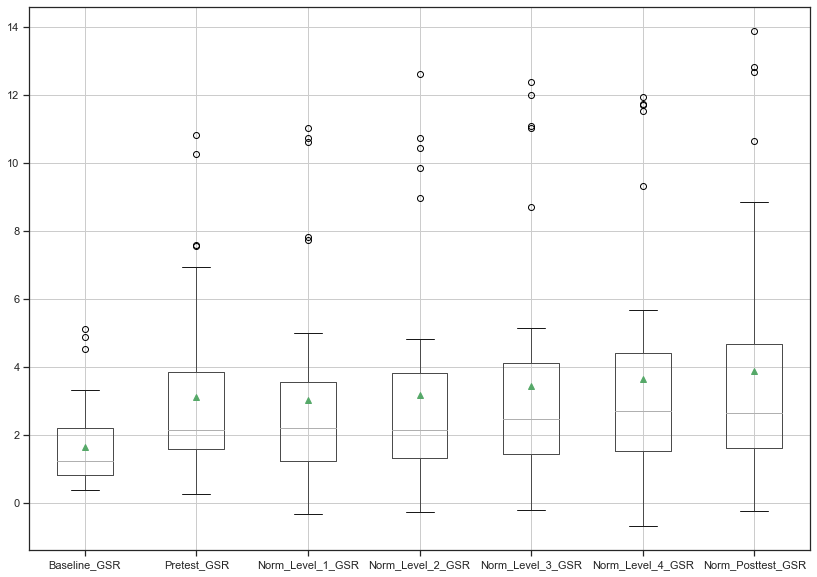

In [16]:
#Draw box plot of Baseline_HR and Baseline_GSR columns in ph_results_df
ph_results_df.boxplot(column=['Baseline_GSR', 'Pretest_GSR' , 'Norm_Level_1_GSR', 'Norm_Level_2_GSR', 'Norm_Level_3_GSR', 'Norm_Level_4_GSR', 'Norm_Posttest_GSR'], figsize=(14,10),showmeans=True)


In [ ]:
#ph_results_df.boxplot(column=['Baseline_HR', 'Pretest_HR' , 'Norm_Level_1_HR', 'Norm_Level_2_HR', 'Norm_Level_3_HR', 'Norm_Level_4_HR', 'Norm_Posttest_HR'], figsize=(14,10),showmeans=True)

In [ ]:
#ph_results_df.boxplot(column=['Pretest_Time', 'Level_1_Time', 'Level_2_Time', 'Level_3_Time', 'Level_4_Time', 'Posttest_Time'], figsize=(14,10),showmeans=True)

In [ ]:
#ph_results_df.boxplot(column=['Pretest_Mistake_Time', 'Level_1_Mistake_Time', 'Level_2_Mistake_Time', 'Level_3_Mistake_Time', 'Level_4_Mistake_Time', 'Posttest_Mistake_Time'], figsize=(14,10),showmeans=True)

In [48]:
#vr_results_df['Norm_Level_1_GSR'].hist(bins=20)

In [ ]:
#vr_results_df[vr_results_df["Norm_Level_1_GSR"].notna()]["Norm_Level_1_GSR"]

In [71]:
vr_eff_df = pd.read_csv('..\\OnlineSurvey\\Self_Eff_VR.csv')
vr_eff_df
print("Wilcoxon test for pre and post-training self-efficacy in VR condition")
print(stats.wilcoxon(vr_eff_df['Eff1'], vr_eff_df['Eff2']))

Wilcoxon test for pre and post-training self-efficacy in VR condition
WilcoxonResult(statistic=120.5, pvalue=0.015977108919375097)


In [ ]:
vr_eff_df.describe()

,Eff1,Eff2
count,45.000000,45.000000
mean,3.800000,4.244444
std,1.099587,1.111010
min,1.000000,2.000000
25%,3.000000,3.000000
50%,4.000000,4.000000
75%,5.000000,5.000000
max,6.000000,6.000000


In [ ]:
#vr_results_df.boxplot(column=['Baseline_GSR', 'Norm_Pretest_GSR' , 'Norm_Level_1_GSR', 'Norm_Level_2_GSR', 'Norm_Level_3_GSR', 'Norm_Level_4_GSR', 'Norm_Posttest_GSR'], figsize=(14,10),showmeans=True)
#vr_results_df.boxplot(column=['Baseline_HR', 'Norm_Pretest_HR' , 'Norm_Level_1_HR', 'Norm_Level_2_HR', 'Norm_Level_3_HR', 'Norm_Level_4_HR', 'Norm_Posttest_HR'], figsize=(14,10),showmeans=True)
#vr_results_df.boxplot(column=['Pretest_Time', 'Level_1_Time', 'Level_2_Time', 'Level_3_Time', 'Level_4_Time', 'Posttest_Time'], figsize=(10,10),showmeans=True)
#vr_results_df.boxplot(column=['Pretest_Mistake_Time', 'Level_1_Mistake_Time', 'Level_2_Mistake_Time', 'Level_3_Mistake_Time', 'Level_4_Mistake_Time', 'Posttest_Mistake_Time'], figsize=(14,10),showmeans=True)

VR vs Physical

In [ ]:
print(stats.mannwhitneyu(x=ph_eff_df['Eff_diff'], y=vr_eff_df['Eff_diff'], alternative = 'less')) 

MannwhitneyuResult(statistic=767.5, pvalue=0.058472133788943795)


In [ ]:
vr_results_df['Mistake_Gain'].describe()

count    41.000000
mean      1.212057
std       2.029335
min      -2.590388
25%      -0.013862
50%       1.053452
75%       1.688275
max      10.733681
Name: Mistake_Gain, dtype: float64

In [85]:
#combined_results_df['Test_Score'] = 1 / np.sqrt(combined_results_df['Time_Gain'] * combined_results_df['Mistake_Gain'])

C:\Users\au657021\AppData\Local\Continuum\anaconda3\envs\buzz_env\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


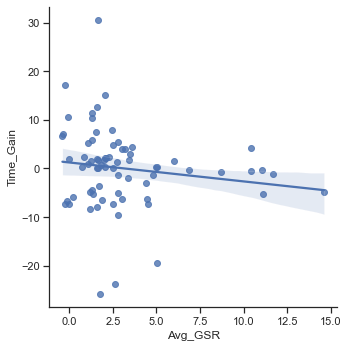

In [107]:
sns.lmplot(data=combined_results_df, x="Avg_GSR", y="Time_Gain")

In [ ]:
combined_results_df_high_HR = combined_results_df[combined_results_df['Avg_HR'] > combined_results_df['Avg_HR'].quantile(0.75)]
print(stats.spearmanr(combined_results_df_high_HR['Avg_HR'], combined_results_df_high_HR['Mistake_Gain'], nan_policy='omit'))
print(stats.spearmanr(combined_results_df_high_HR['Avg_HR'], combined_results_df_high_HR['Time_Gain'], nan_policy='omit'))

SpearmanrResult(correlation=0.3560371517027864, pvalue=0.14702554764788864)
SpearmanrResult(correlation=-0.09803921568627451, pvalue=0.6987424830235279)


In [ ]:
combined_results_df_low_HR = combined_results_df[combined_results_df['Avg_HR'] < combined_results_df['Avg_HR'].quantile(0.25)]
print(stats.spearmanr(combined_results_df_low_HR['Avg_HR'], combined_results_df_low_HR['Mistake_Gain'], nan_policy='omit'))
print(stats.spearmanr(combined_results_df_low_HR['Avg_HR'], combined_results_df_low_HR['Time_Gain'], nan_policy='omit'))

SpearmanrResult(correlation=0.12972972972972976, pvalue=0.4507871465252461)
SpearmanrResult(correlation=-0.05662805662805664, pvalue=0.7428808870113839)


In [ ]:
combined_results_df_mid_HR = combined_results_df[(combined_results_df['Avg_HR'] > combined_results_df['Avg_HR'].quantile(0.15)) & (combined_results_df['Avg_HR'] < combined_results_df['Avg_HR'].quantile(0.85))]
print(stats.spearmanr(combined_results_df_mid_HR['Avg_HR'], combined_results_df_mid_HR['Mistake_Gain'], nan_policy='omit'))
print(stats.spearmanr(combined_results_df_mid_HR['Avg_HR'], combined_results_df_mid_HR['Time_Gain'], nan_policy='omit'))

SpearmanrResult(correlation=0.1479471788715486, pvalue=0.3052024577818458)
SpearmanrResult(correlation=0.015702280912364946, pvalue=0.913813102725811)


In [ ]:
combined_results_df_hilo_hr = pd.concat([combined_results_df_high_HR, combined_results_df_low_HR], axis=0)
print(stats.spearmanr(combined_results_df_hilo_hr['Avg_HR'], combined_results_df_hilo_hr['Mistake_Gain'], nan_policy='omit'))

SpearmanrResult(correlation=0.19716859716859722, pvalue=0.24906668175139635)


In [ ]:
combined_results_df_high_GSR = combined_results_df[combined_results_df['Avg_GSR'] > combined_results_df['Avg_GSR'].quantile(0.75)]
print(stats.spearmanr(combined_results_df_high_GSR['Avg_GSR'], combined_results_df_high_GSR['Mistake_Gain'], nan_policy='omit'))
print(stats.spearmanr(combined_results_df_high_GSR['Avg_GSR'], combined_results_df_high_GSR['Time_Gain'], nan_policy='omit'))

SpearmanrResult(correlation=-0.2507739938080495, pvalue=0.31551339595948574)
SpearmanrResult(correlation=-0.1496388028895769, pvalue=0.5534228921214378)


In [ ]:
combined_results_df_low_GSR = combined_results_df[combined_results_df['Avg_HR'] < combined_results_df['Avg_HR'].quantile(0.25)]
print(stats.spearmanr(combined_results_df_low_GSR['Avg_GSR'], combined_results_df_low_GSR['Mistake_Gain'], nan_policy='omit'))
print(stats.spearmanr(combined_results_df_low_GSR['Avg_GSR'], combined_results_df_low_GSR['Time_Gain'], nan_policy='omit'))

SpearmanrResult(correlation=-0.11867905056759545, pvalue=0.6390493358496443)
SpearmanrResult(correlation=-0.31475748194014447, pvalue=0.20331354771785812)


In [ ]:
combined_results_df.describe()

C:\Users\au657021\AppData\Local\Continuum\anaconda3\envs\buzz_env\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,Unnamed: 0,Baseline_HR,Baseline_GSR,Pretest_Time,Pretest_Mistake_Time,Pretest_GSR,Pretest_HR,Level_1_Time,Level_1_Mistake_Time,Level_1_HR,...,Norm_Level_3_HR,Norm_Level_3_GSR,Norm_Level_4_HR,Norm_Level_4_GSR,Norm_Posttest_HR,Norm_Posttest_GSR,Time_Gain,Mistake_Gain,Avg_GSR,Avg_HR
count,40.000000,39.000000,39.000000,40.000000,40.000000,39.000000,39.000000,39.000000,39.000000,39.000000,...,33.000000,33.000000,33.000000,33.000000,33.000000,32.000000,41.000000,41.000000,33.000000,33.000000
mean,19.500000,74.907976,1.638849,21.983323,3.138121,3.105645,79.636630,8.740348,0.191531,74.889141,...,72.337447,2.775583,73.225575,2.913297,76.397509,3.562960,1.340136,1.212057,2.704427,73.214653
std,11.690452,12.295171,1.222840,12.002677,1.581298,2.539813,13.241658,3.952119,0.275587,12.719334,...,13.223825,3.102874,13.303283,3.073179,13.900464,3.437163,8.460420,2.029335,3.076615,13.765000
min,0.000000,49.836066,0.388673,8.458740,0.000000,0.252664,54.466667,4.038280,0.000000,51.000000,...,48.904762,-0.391428,43.925926,-0.362710,49.055556,-0.057359,-19.471416,-2.590388,-0.398094,45.700435
25%,9.750000,66.208619,0.821497,13.955063,2.149136,1.594634,68.371528,6.028757,0.000000,65.215909,...,63.424242,1.274730,66.337838,1.586777,67.900000,1.640301,-4.778246,-0.013862,1.264140,64.848853
50%,19.500000,76.407080,1.225052,18.793420,2.962966,2.151845,79.366667,7.407319,0.092889,76.000000,...,70.578947,2.018353,70.210526,2.102728,74.566667,2.604463,1.490965,1.053452,1.879275,70.539719
75%,29.250000,84.449404,2.214465,26.257368,3.940936,3.861507,88.063235,10.465781,0.281453,83.392857,...,76.903226,2.874541,78.636364,3.075578,82.097561,3.950630,5.845163,1.688275,2.795485,78.948851
max,39.000000,96.401384,5.098206,71.426308,8.981445,10.820270,106.718750,24.004306,1.291825,101.200000,...,111.548387,14.945498,110.391304,14.350258,113.581395,14.677046,29.535441,10.733681,14.613092,111.919660


In [ ]:
print(stats.mannwhitneyu(x=vr_results_df['Avg_GSR'].dropna(), y=ph_results_df['Avg_GSR'].dropna(), alternative = 'less'))
print(stats.mannwhitneyu(x=vr_results_df['Avg_HR'].dropna(), y=ph_results_df['Avg_HR'].dropna(), alternative = 'less'))

MannwhitneyuResult(statistic=542.0, pvalue=0.12683894842626298)
MannwhitneyuResult(statistic=596.0, pvalue=0.29764869379041836)


In [ ]:
#Levene's test for equal variances
'''
print(stats.levene(ph_results_df['Norm_Pretest_HR'], vr_results_df['Norm_Pretest_HR'], center='median'))
print(stats.levene(ph_results_df['Norm_Level_1_HR'], vr_results_df['Norm_Level_1_HR'], center='median'))
print(stats.levene(ph_results_df['Norm_Level_2_HR'], vr_results_df['Norm_Level_2_HR'], center='median'))
print(stats.levene(ph_results_df['Norm_Level_3_HR'], vr_results_df['Norm_Level_3_HR'], center='median'))
print(stats.levene(ph_results_df['Norm_Level_4_HR'], vr_results_df['Norm_Level_4_HR'], center='median'))

print(stats.levene(ph_results_df['Norm_Pretest_GSR'], vr_results_df['Norm_Pretest_GSR'], center='median'))
print(stats.levene(ph_results_df['Norm_Level_1_GSR'], vr_results_df['Norm_Level_1_GSR'], center='median'))
print(stats.levene(ph_results_df['Norm_Level_2_GSR'], vr_results_df['Norm_Level_2_GSR'], center='median'))
print(stats.levene(ph_results_df['Norm_Level_3_GSR'], vr_results_df['Norm_Level_3_GSR'], center='median'))
print(stats.levene(ph_results_df['Norm_Level_4_GSR'], vr_results_df['Norm_Level_4_GSR'], center='median'))
'''

LeveneResult(statistic=nan, pvalue=nan)
LeveneResult(statistic=nan, pvalue=nan)
LeveneResult(statistic=nan, pvalue=nan)
LeveneResult(statistic=nan, pvalue=nan)
LeveneResult(statistic=nan, pvalue=nan)
LeveneResult(statistic=nan, pvalue=nan)
LeveneResult(statistic=nan, pvalue=nan)
LeveneResult(statistic=nan, pvalue=nan)
LeveneResult(statistic=nan, pvalue=nan)
LeveneResult(statistic=nan, pvalue=nan)


In [75]:
vr_eff_df['Condition'] = 'VR'
ph_eff_df['Condition'] = 'Physical'
combined_eff_df = pd.concat([vr_eff_df, ph_eff_df])

In [77]:
combined_eff_df
#combined_eff_df = combined_results_df[['Pretest_Mistake_Time', 'Posttest_Mistake_Time', 'Condition']].copy()
combined_eff_df.rename(columns={'Eff1': 'Pre-training', 'Eff2': 'Post-training'}, inplace=True)
combined_eff_df_long = combined_eff_df.melt(id_vars=['Condition'], var_name='Self-efficacy', value_name='Efficacy Level')
combined_eff_df_long

,Condition,Self-efficacy,Efficacy Level
0,VR,Pre-training,5
1,VR,Pre-training,5
2,VR,Pre-training,5
3,VR,Pre-training,4
4,VR,Pre-training,4
...,...,...,...
169,Physical,Post-training,3
170,Physical,Post-training,6
171,Physical,Post-training,4
172,Physical,Post-training,4


C:\Users\au657021\AppData\Local\Continuum\anaconda3\envs\buzz_env\lib\site-packages\seaborn\categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


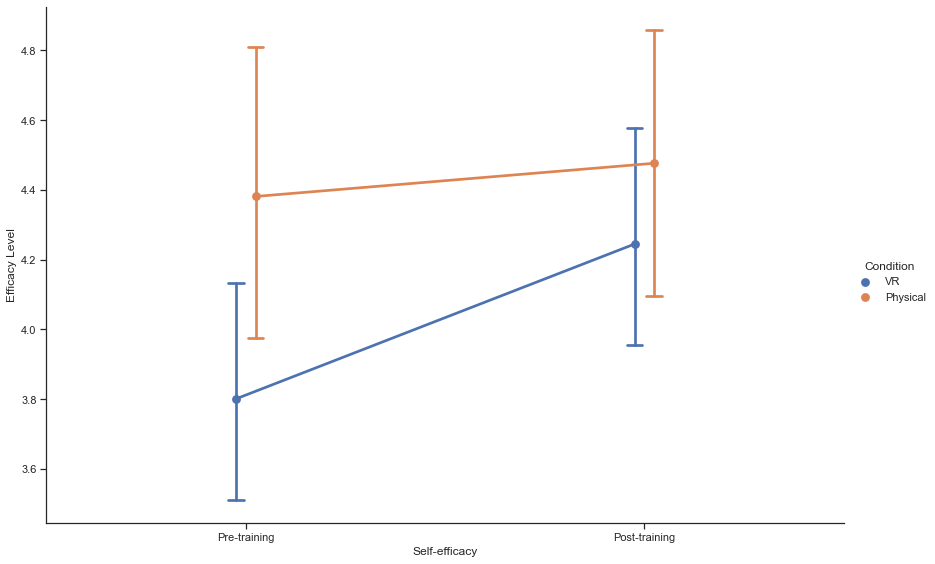

In [78]:
sns.catplot(x='Self-efficacy', y='Efficacy Level', dodge = True, hue= 'Condition', kind="point", data=combined_eff_df_long, size=8, aspect=1.5, capsize=.04)

In [35]:
vr_results_df['Condition'] = 'VR'
ph_results_df['Condition'] = 'Physical'

In [36]:
vr_results_df.columns

Index(['Unnamed: 0', 'Participant_ID', 'Baseline_HR', 'Baseline_GSR',
       'Pretest_Time', 'Pretest_Mistake_Time', 'Pretest_GSR', 'Pretest_HR',
       'Level_1_Time', 'Level_1_Mistake_Time', 'Level_1_HR', 'Level_1_GSR',
       'Level_2_Time', 'Level_2_Mistake_Time', 'Level_2_HR', 'Level_2_GSR',
       'Level_3_Time', 'Level_3_Mistake_Time', 'Level_3_HR', 'Level_3_GSR',
       'Level_4_Time', 'Level_4_Mistake_Time', 'Level_4_HR', 'Level_4_GSR',
       'Posttest_Time', 'Posttest_Mistake_Time', 'Posttest_GSR', 'Posttest_HR',
       'Condition', 'Time_Gain', 'Mistake_Gain', 'Norm_Pretest_HR',
       'Norm_Pretest_GSR', 'Norm_Level_1_HR', 'Norm_Level_1_GSR',
       'Norm_Level_2_HR', 'Norm_Level_2_GSR', 'Norm_Level_3_HR',
       'Norm_Level_3_GSR', 'Norm_Level_4_HR', 'Norm_Level_4_GSR',
       'Norm_Posttest_HR', 'Norm_Posttest_GSR', 'Avg_GSR', 'Avg_HR'],
      dtype='object')

In [65]:
combined_results_df = pd.concat([vr_results_df, ph_results_df])
#combined_results_df = combined_results_df[['Pretest_Time', 'Posttest_Time', 'Condition']].copy()
combined_results_df = combined_results_df[['Pretest_Mistake_Time', 'Posttest_Mistake_Time', 'Condition']].copy()
combined_results_df.rename(columns={'Pretest_Mistake_Time': 'Pretest', 'Posttest_Mistake_Time': 'Posttest'}, inplace=True)
combined_results_df_long = combined_results_df.melt(id_vars=['Condition'], var_name='Test', value_name='Time')

In [49]:
combined_results_df_long

,Condition,Variable,Time
0,VR,Pretest_Time,24.540540
1,VR,Pretest_Time,36.800053
2,VR,Pretest_Time,37.060505
3,VR,Pretest_Time,27.061413
4,VR,Pretest_Time,39.901130
...,...,...,...
157,Physical,Posttest_Time,18.503739
158,Physical,Posttest_Time,22.779398
159,Physical,Posttest_Time,18.156550
160,Physical,Posttest_Time,40.977314


C:\Users\au657021\AppData\Local\Continuum\anaconda3\envs\buzz_env\lib\site-packages\seaborn\categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


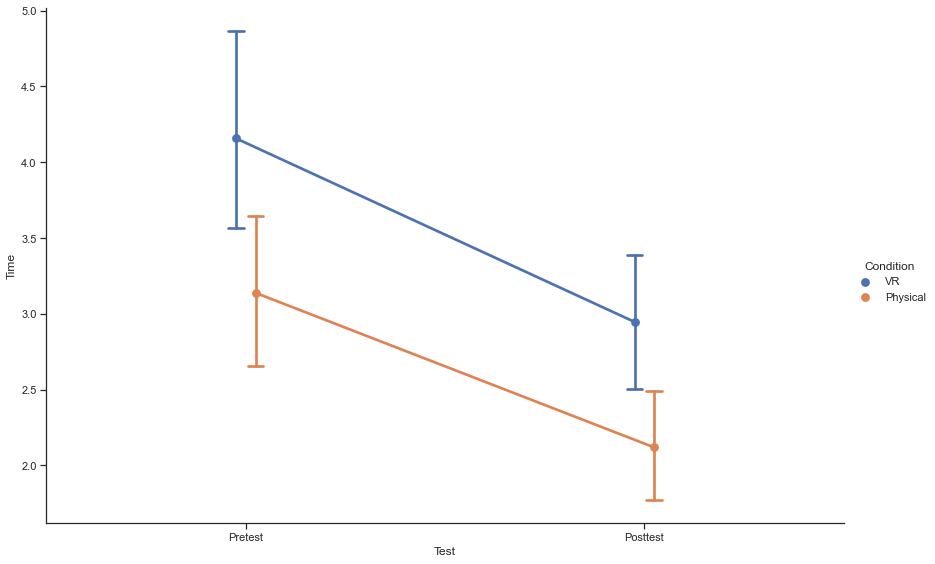

In [66]:
sns.catplot(x='Test', y='Time', dodge = True, hue= 'Condition', kind="point", data=combined_results_df_long, size=8, aspect=1.5, capsize=.04)

In [18]:
vr_nasatlx_df = pd.read_csv('..\\OnlineSurvey\\VR_Nasa.csv')
ph_nasatlx_df = pd.read_csv('..\\OnlineSurvey\\Ph_Nasa.csv')
vr_nasatlx_df['Condition'] = 'VR'
ph_nasatlx_df['Condition'] = 'Physical'
nasatlx_df = pd.concat([vr_nasatlx_df, ph_nasatlx_df])
nasatlx_df_long = nasatlx_df.melt(id_vars=['Condition'], var_name='Variable', value_name='Level')
nasatlx_df_long

,Condition,Variable,Level
0,VR,Mental Demand,13
1,VR,Mental Demand,12
2,VR,Mental Demand,8
3,VR,Mental Demand,8
4,VR,Mental Demand,18
...,...,...,...
517,Physical,Frustration,17
518,Physical,Frustration,2
519,Physical,Frustration,11
520,Physical,Frustration,3


C:\Users\au657021\AppData\Local\Continuum\anaconda3\envs\buzz_env\lib\site-packages\seaborn\categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


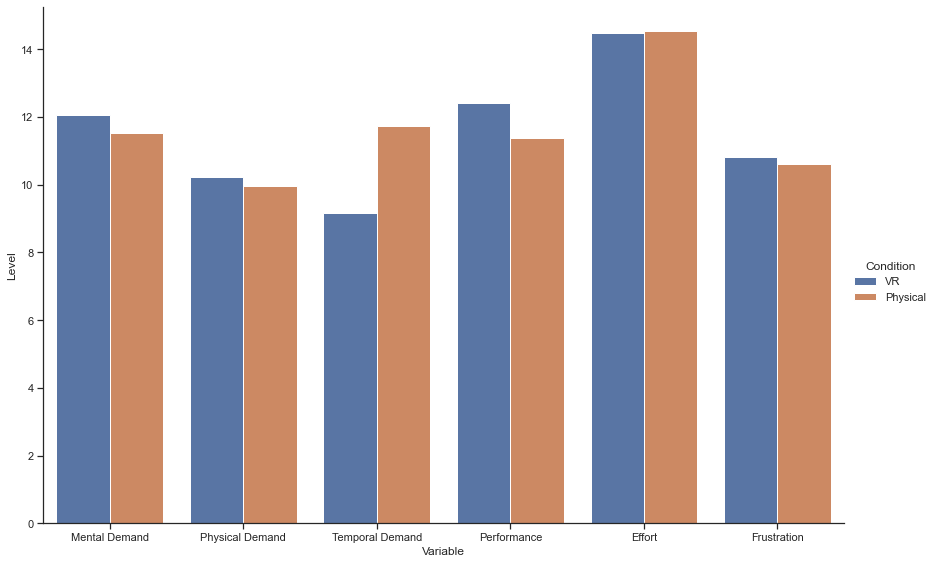

In [68]:

sns.catplot(x='Variable', y='Level', hue= 'Condition', kind="bar", data=nasatlx_df_long, size=8, aspect=1.5, ci = None)

In [ ]:
ph_nasatlx_df['Frustration'].describe()

count    42.000000
mean     10.619048
std       5.656649
min       1.000000
25%       5.000000
50%      12.000000
75%      15.000000
max      21.000000
Name: Frustration, dtype: float64

In [ ]:
print("Mann Whitney U test for Mental Demand in VR vs physical")
print(stats.mannwhitneyu(x=ph_nasatlx_df['Mental Demand'], y=vr_nasatlx_df['Mental Demand']))
print("Mann Whitney U test for Physical Demand in VR vs physical")
print(stats.mannwhitneyu(x=ph_nasatlx_df['Physical Demand'], y=vr_nasatlx_df['Physical Demand']))
print("Mann Whitney U test for Temporal Demand in VR vs physical")
print(stats.mannwhitneyu(x=ph_nasatlx_df['Temporal Demand'], y=vr_nasatlx_df['Temporal Demand']))
print("Mann Whitney U test for Performance in VR vs physical")
print(stats.mannwhitneyu(x=ph_nasatlx_df['Performance'], y=vr_nasatlx_df['Performance']))
print("Mann Whitney U test for Effort in VR vs physical")
print(stats.mannwhitneyu(x=ph_nasatlx_df['Effort'], y=vr_nasatlx_df['Effort']))
print("Mann Whitney U test for Frustration in VR vs physical")
print(stats.mannwhitneyu(x=ph_nasatlx_df['Frustration'], y=vr_nasatlx_df['Frustration']))


Mann Whitney U test for Mental Demand in VR vs physical
MannwhitneyuResult(statistic=874.0, pvalue=0.5476396506501511)
Mann Whitney U test for Physical Demand in VR vs physical
MannwhitneyuResult(statistic=915.0, pvalue=0.8017537172432971)
Mann Whitney U test for Temporal Demand in VR vs physical
MannwhitneyuResult(statistic=1240.0, pvalue=0.012120548114918736)
Mann Whitney U test for Performance in VR vs physical
MannwhitneyuResult(statistic=802.0, pvalue=0.22471942196316996)
Mann Whitney U test for Effort in VR vs physical
MannwhitneyuResult(statistic=973.0, pvalue=0.814670863592921)
Mann Whitney U test for Frustration in VR vs physical
MannwhitneyuResult(statistic=922.5, pvalue=0.8514775130430722)


In [ ]:
#Create a dataframe with the mean values of each column in the ph_nasatlx_df and vr_nasatlx_df
#nasatlx_df = pd.DataFrame(columns=['Mental Demand', 'Physical Demand', 'Temporal Demand', 'Performance', 'Effort', 'Frustration'])
#nasatlx_df = nasatlx_df.append(pd.DataFrame([[ph_nasatlx_df['Mental Demand'].mean(), ph_nasatlx_df['Physical Demand'].mean(), ph_nasatlx_df['Temporal Demand'].mean(), ph_nasatlx_df['Performance'].mean(), ph_nasatlx_df['Effort'].mean(), ph_nasatlx_df['Frustration'].mean()]], columns=['Mental Demand', 'Physical Demand', 'Temporal Demand', 'Performance', 'Effort', 'Frustration'], index=['PH'] ))
#nasatlx_df = nasatlx_df.append(pd.DataFrame([[vr_nasatlx_df['Mental Demand'].mean(), vr_nasatlx_df['Physical Demand'].mean(), vr_nasatlx_df['Temporal Demand'].mean(), vr_nasatlx_df['Performance'].mean(), vr_nasatlx_df['Effort'].mean(), vr_nasatlx_df['Frustration'].mean()]], columns=['Mental Demand', 'Physical Demand', 'Temporal Demand', 'Performance', 'Effort', 'Frustration'], index=['VR'] ))

In [ ]:
#nasatlx_df

,Mental Demand,Physical Demand,Temporal Demand,Performance,Effort,Frustration
PH,11.523810,9.952381,11.714286,11.380952,14.523810,10.619048
VR,12.066667,10.222222,9.155556,12.400000,14.488889,10.822222


In [4]:
import neurokit2 as nk

# Download example data
data = nk.data("bio_eventrelated_100hz")

# Preprocess the data (filter, find peaks, etc.)
processed_data, info = nk.bio_process(ecg=data["ECG"], rsp=data["RSP"], eda=data["EDA"], sampling_rate=100)

# Compute relevant features
results = nk.bio_analyze(processed_data, sampling_rate=100)

C:\Users\au657021\AppData\Local\Continuum\anaconda3\envs\buzz_env\lib\site-packages\sklearn\neighbors\_distance_metric.py:10: FutureWarning: sklearn.neighbors.DistanceMetric has been moved to sklearn.metrics.DistanceMetric in 1.0. This import path will be removed in 1.3
  warnings.warn(


In [9]:
results.columns

Index(['ECG_Rate_Mean', 'HRV_MeanNN', 'HRV_SDNN', 'HRV_SDANN1', 'HRV_SDNNI1',
       'HRV_SDANN2', 'HRV_SDNNI2', 'HRV_SDANN5', 'HRV_SDNNI5', 'HRV_RMSSD',
       ...
       'SCR_Peaks_N', 'SCR_Peaks_Amplitude_Mean', 'RSA_P2T_Mean',
       'RSA_P2T_Mean_log', 'RSA_P2T_SD', 'RSA_P2T_NoRSA', 'RSA_PorgesBohrer',
       'RSA_Gates_Mean', 'RSA_Gates_Mean_log', 'RSA_Gates_SD'],
      dtype='object', length=113)